# <u>Task 1: Data Cleaning & Preprocessing</u>
* Objective: Clean and prepare raw data for machine learning.
* Tools Used: Python, Pandas, NumPy, Seaborn, Matplotlib



**Step 1: Import libraries**
|

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

 **Step 2: Load dataset**

In [28]:
df = pd.read_csv('Titanic-Dataset.csv')

<u>**See first few rows**</u>

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Step 3: Basic exploration**

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None


In [31]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [32]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


**Step 4: Handle missing values**

<u>**1. Age has missing values — fill with median**</u>

In [33]:
df['Age'] = df['Age'].fillna(df['Age'].median())

<u>**2. Embarked has missing values — fill with mode**</u>

In [34]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

**Drop Cabin (too many nulls)**

In [35]:
df.drop('Cabin', axis=1, inplace=True)

In [37]:
df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [38]:
df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [39]:
df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

**Step 5: Encode categorical variables**

In [36]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

<u>**One-Hot Encode 'Embarked'**</u>

In [40]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

**Step 6: Normalize/Standardize numerical features**
* Normalize Age and Fare using MinMaxScaler

In [41]:
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

**Step 7: Visualize with a box plot**

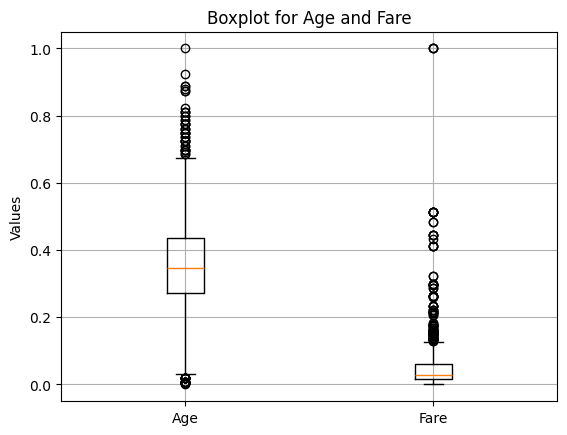

In [42]:
plt.boxplot([df['Age'], df['Fare']], labels=['Age', 'Fare'])
plt.title('Boxplot for Age and Fare')
plt.ylabel('Values')
plt.grid(True)
plt.show()

**Remove outliers using IQR**

In [43]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

df = remove_outliers_iqr(df, 'Fare')
df = remove_outliers_iqr(df, 'Age')


In [44]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    1  0.271174      1      0   
2                        Heikkinen, Miss. Laina    0  0.321438      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.434531      1      0   
4                      Allen, Mr. William Henry    1  0.434531      0      0   
5                              Moran, Mr. James    1  0.346569      0      0   

             Ticket      Fare  Embarked_Q  Embarked_S  
0         A/5 21171  0.014151       False        True  
2  STON/O2. 3101282  0.015469       False        True  
3            113803  0.103644       False        True  
4            373450  0.015713       False        True  
5            330877  0